In [1]:
import os
import open3d as o3d

#IMPORT MODULES
from context import geomapi 
from geomapi.nodes import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In this notebook we load the data produced by the NavVis sensors and visualize them

In [4]:
data_directory = r"C:\Data\VLX"
project_directory  = r"C:\Data\Test-Project"
mapping_sessions = ["2021-02-04_17.50.36"]

sn = SessionNode(subject="Testproject", projectPath= project_directory)

sn.tempPath = None
sn.outputPath = None

if not sn.tempPath:
    sn.projectProcessingPath = os.path.join(sn.projectPath, "PROCESSING")
else:
    sn.projectProcessingPath = sn.tempPath


path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano","pano-poses.csv" )

Loading the Pano Images

30.645347278659475
16.219203296580314
-44.31674140866289
-71.76810645818475
-70.51694032314853
-66.14106462885864
-70.48273311404816
-165.84332309477043
-165.33504707125394
-166.159886400265
163.1193175276788
108.70128247310878
110.49362562153227
109.75363452333697
77.5250529205687
1.8669149923540733
-25.15673754087248
-44.538306718819726
-70.50416189042345
-67.29576081803648
-26.27687311526659
41.34545365286449
-30.300931099133287
-42.62681463733171
-8.979859013636359
-79.64140489263318
89.89054431039955
118.45408593066122
110.42719354326536
179.93298970468487
115.66609236992602
169.1184635421139
103.3587247893378
91.44598568225929
12.190091635058225
-47.94877232041672
-74.16623382347179
106.68241680211572
-147.47978264591066
-177.5964785398445
97.75558393837947
40.54940434868038
38.14051403404126
134.2777268814964
-103.44376001291955
-153.68444834050013
-73.76954666970921
-70.79982786581526
-74.29572911448197
-75.05203676205973


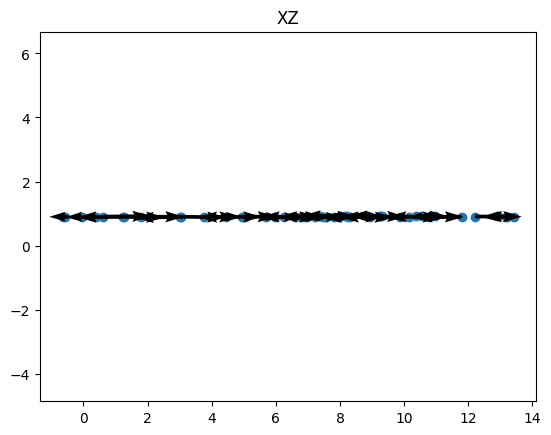

30.645347278659475
16.219203296580314
-44.31674140866289
-71.76810645818475
-70.51694032314853
-66.14106462885864
-70.48273311404816
-165.84332309477043
-165.33504707125394
-166.159886400265
163.1193175276788
108.70128247310878
110.49362562153227
109.75363452333697
77.5250529205687
1.8669149923540733
-25.15673754087248
-44.538306718819726
-70.50416189042345
-67.29576081803648
-26.27687311526659
41.34545365286449
-30.300931099133287
-42.62681463733171
-8.979859013636359
-79.64140489263318
89.89054431039955
118.45408593066122
110.42719354326536
179.93298970468487
115.66609236992602
169.1184635421139
103.3587247893378
91.44598568225929
12.190091635058225
-47.94877232041672
-74.16623382347179
106.68241680211572
-147.47978264591066
-177.5964785398445
97.75558393837947
40.54940434868038
38.14051403404126
134.2777268814964
-103.44376001291955
-153.68444834050013
-73.76954666970921
-70.79982786581526
-74.29572911448197
-75.05203676205973


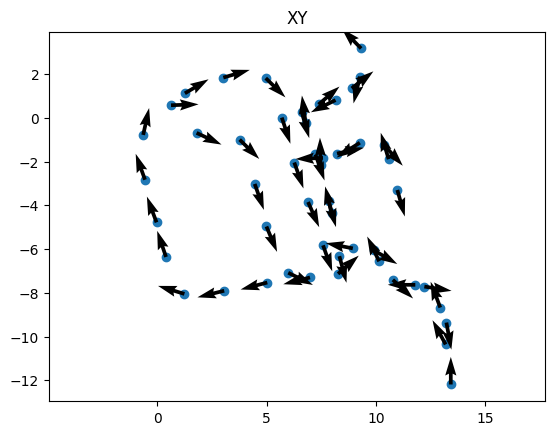

In [5]:
import csv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
import numpy as np

def get_heading(orientation):
    """
        Heading measured as angle from x to y axis. In equirectangular format
        this is the center of the pano. Headings are always positive to
        simplify subsequent calculations.

        See 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html'
    """
    heading = Rotation.from_quat(orientation).as_euler('xyz', degrees=True)[-1]
    # if heading < 0:
    #     heading = 360 + heading
    print(heading)
    
    return heading



def get_zenit(orientation):
    """
    Angle with the vertical
    """
    zenit = Rotation.from_quat(orientation).as_euler('xyz', degrees=True)[0]
    
    return zenit

def plot_pano_positions_xz(panos, colors=None, headings=False):
    """
    ppcs: list of PanoPoseCollection
    headings: boolean (default: False) - plots headings as vectors
    with size 1.
    """
    _, ax = plt.subplots()

    n = len(panos)
    pos_xs, pos_ys = np.zeros(n), np.zeros(n)
    ori_xs, ori_ys = np.zeros(n), np.zeros(n)

    pos_zs = np.zeros(n)
    ori_zs = np.zeros(n)

    for i, ppc in enumerate(panos):
        kwargs = {}
        pos_xs[i] = ppc.pos_x
        pos_zs[i] = ppc.pos_z

        if colors is not None:
            kwargs['c'] = colors[i]
  
        if headings is True:
            pc_headings = get_heading(ppc.orientation)
            ori_xs[i] = np.cos(np.radians(pc_headings))

            pc_zenits = get_zenit(ppc.orientation)
            ori_zs[i] = np.sin(np.radians(pc_zenits))

    ax.scatter(pos_xs, pos_zs, **kwargs)
    ax.quiver(pos_xs, pos_zs, ori_xs, ori_zs, color='k')

    ax.axis('equal')
    plt.title('XZ')
    plt.ion()
    plt.show()

def plot_pano_positions_yz(panos, colors=None, headings=False):
    """
    ppcs: list of PanoPoseCollection
    headings: boolean (default: False) - plots headings as vectors
    with size 1.
    """
    
    _, ax = plt.subplots()

    n = len(panos)
    pos_xs, pos_ys = np.zeros(n), np.zeros(n)
    ori_xs, ori_ys = np.zeros(n), np.zeros(n)

    pos_zs = np.zeros(n)
    ori_zs = np.zeros(n)

    for i, ppc in enumerate(panos):
        kwargs = {}
        pos_ys[i] = ppc.pos_y
        pos_zs[i] = ppc.pos_z

        if colors is not None:
            kwargs['c'] = colors[i]
  
        if headings is True:
            pc_headings = get_heading(ppc.orientation)
            ori_ys[i] = np.sin(np.radians(pc_headings))

            pc_zenits = get_zenit(ppc.orientation)
            ori_zs[i] = np.sin(np.radians(pc_zenits))

    ax.scatter(pos_ys, pos_zs, **kwargs)
    ax.quiver(pos_ys, pos_zs, ori_ys, ori_zs, color='k')

    ax.axis('equal')
    plt.title('YZ')
    plt.ion()
    plt.show()

def plot_pano_positions(panos, colors=None, headings=False, z = False):
    """
    ppcs: list of PanoPoseCollection
    headings: boolean (default: False) - plots headings as vectors
    with size 1.
    """
    
    if z:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    else:
        _, ax = plt.subplots()

    n = len(panos)
    pos_xs, pos_ys = np.zeros(n), np.zeros(n)
    ori_xs, ori_ys = np.zeros(n), np.zeros(n)
    if z: 
        pos_zs = np.zeros(n)
        ori_zs = np.zeros(n)

    for i, ppc in enumerate(panos):
        kwargs = {}
        pos_xs[i] = ppc.pos_x
        pos_ys[i] = ppc.pos_y
        if z:
            pos_zs[i] = ppc.pos_z
        if colors is not None:
            kwargs['c'] = colors[i]
  
        if headings is True:
            pc_headings = get_heading(ppc.orientation)
            
            ori_xs[i] = np.cos(np.radians(pc_headings))
            ori_ys[i] = np.sin(np.radians(pc_headings))

            if z:
                pc_zenits = get_zenit(ppc.orientation)
                ori_zs[i] = np.sin(np.radians(pc_zenits))

    if z:
        ax.scatter(pos_xs, pos_ys, pos_zs, **kwargs)
        ax.quiver(pos_xs, pos_ys,pos_zs, ori_xs, ori_ys, ori_zs, length=0.5, color='k')
        ax.axis('auto')
        plt.title('XYZ')
    else:
        ax.scatter(pos_xs, pos_ys, **kwargs)
        ax.quiver(pos_xs, pos_ys, ori_xs, ori_ys, color='k')
        ax.axis('equal')
        plt.title('XY')
    plt.ion()
    plt.show()


with open(path, mode='r') as file:
    count = 0
    csvfile = csv.reader(file)
    panos = []
    for line in csvfile:
        line = line[0].split('; ')

        if not line[0].startswith("#") and count < 50:
            
            panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano", line[1])
            pn = ImageNode(path=panoPath)
            pn.timestamp = line[2]
            pn.pos_x = line[3]
            pn.pos_y = line[4]
            pn.pos_z = line[5]
            pn.orientation = (line[7],line[8], line[9], line[6])
            panos.append(pn)
            count += 1
            
plot_pano_positions_xz(panos, headings=True,)
plot_pano_positions(panos, headings=True, z= False)

read the seperate camera positions from the json file

['0', '00000-pano.jpg', '1612457464.516936', '1.257570', '1.118743', '0.902980', '0.963384', '0.005606', '-0.048821', '0.263584']
['1', '00001-pano.jpg', '1612457471.045584', '3.015247', '1.839228', '0.905692', '0.988377', '0.000864', '-0.058276', '0.140405']
22.211054595520203
-2.4345491647503317
19.87926716332359
2.299751646257563
30.645347278659475
25.918170460969243
-2.277327678062527
23.372992057245835
2.511025660152067
16.219203296580314


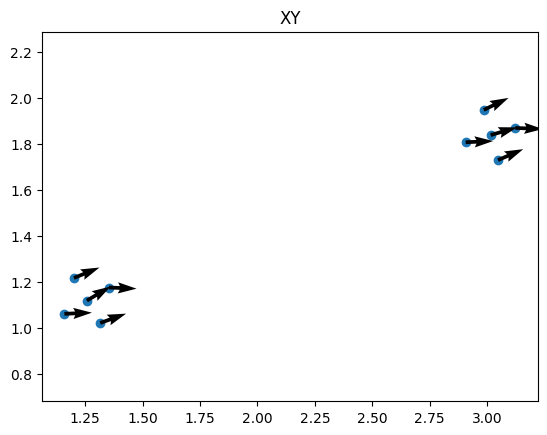

In [6]:
import json

with open(path, mode='r') as file:
    csvfile = csv.reader(file)
    panos = []
    count = 0

    for line in csvfile:
        line = line[0].split('; ')

        if not line[0].startswith("#") and count < 2:
            print(line)
            panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano", line[1])
            pn = ImageNode(path=panoPath)
            pn.name = line[1]
            pn.timestamp = line[2]
            pn.pos_x = line[3]
            pn.pos_y = line[4]
            pn.pos_z = line[5]
            pn.orientation = (line[7], line[8], line[9],line[6])
            panos.append(pn)
            count = count +1


cams = []        
for pano in panos:
    pano_name = pano.name.split("-")[0]
    pano.linkedNodes = []
    info_name = pano_name + "-info.json"
    info_path = panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "info", info_name)
    
    if os.path.isfile(info_path):
        f = open(info_path)
        data = json.load(f)

        # pn = ImageNode()
        # pn.timestamp = data['timestamp']
        # pn.pos_x = data['cam_head']['position'][0]
        # pn.pos_y = data['cam_head']['position'][1]
        # pn.pos_z = data['cam_head']['position'][2]
        # pn.orientation = (data['cam_head']["quaternion"][3], data['cam_head']["quaternion"][0], data['cam_head']["quaternion"][1],data['cam_head']["quaternion"][2])
        # panos.append(pn)

        cam0 = ImageNode()
        cam0.name = pano_name + "-cam0.jpg"
        cam0.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam0.timestamp = data['timestamp']

        cam0.pos_x = data['cam0']['position'][0]
        cam0.pos_y = data['cam0']['position'][1]
        cam0.pos_z = data['cam0']['position'][2]
        cam0.orientation = (data['cam0']['quaternion'][0], data['cam0']['quaternion'][1], data['cam0']['quaternion'][2],data['cam0']['quaternion'][3])
        cams.append(cam0)
        pano.linkedNodes.append(cam0)

        cam1 = ImageNode()
        cam1.name = pano_name + "-cam1.jpg"
        cam1.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam1.timestamp = data['timestamp']

        cam1.pos_x = data['cam1']['position'][0]
        cam1.pos_y = data['cam1']['position'][1]
        cam1.pos_z = data['cam1']['position'][2]
        cam1.orientation = (data['cam1']['quaternion'][0], data['cam1']['quaternion'][1], data['cam1']['quaternion'][2],data['cam1']['quaternion'][3])
        cams.append(cam1)
        pano.linkedNodes.append(cam1)

        cam2 = ImageNode()
        cam2.name = pano_name + "-cam2.jpg"
        cam2.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam2.timestamp = data['timestamp']

        cam2.pos_x = data['cam2']['position'][0]
        cam2.pos_y = data['cam2']['position'][1]
        cam2.pos_z = data['cam2']['position'][2]
        cam2.orientation = (data['cam2']['quaternion'][0], data['cam2']['quaternion'][1], data['cam2']['quaternion'][2],data['cam2']['quaternion'][3])
        cams.append(cam2)
        pano.linkedNodes.append(cam2)

        cam3 = ImageNode()
        cam3.name = pano_name + "-cam3.jpg"
        cam3.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
        cam3.timestamp = data['timestamp']

        cam3.pos_x = data['cam3']['position'][0]
        cam3.pos_y = data['cam3']['position'][1]
        cam3.pos_z = data['cam3']['position'][2]
        cam3.orientation = (data['cam3']['quaternion'][0], data['cam3']['quaternion'][1], data['cam3']['quaternion'][2],data['cam3']['quaternion'][3])
        cams.append(cam3)
        pano.linkedNodes.append(cam3)
        cams.append(pano)

        f.close()




            
plot_pano_positions(cams, headings=True)

0.0
-90.68349375372739
0.0
-90.16670268718357
178.17493134262554


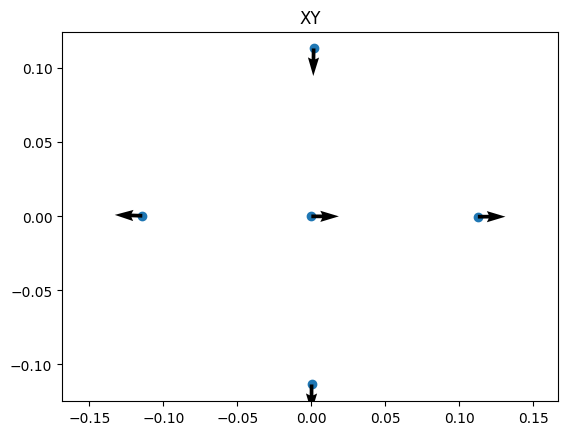

0.0
-90.68349375372739
0.0
-90.16670268718357
178.17493134262554


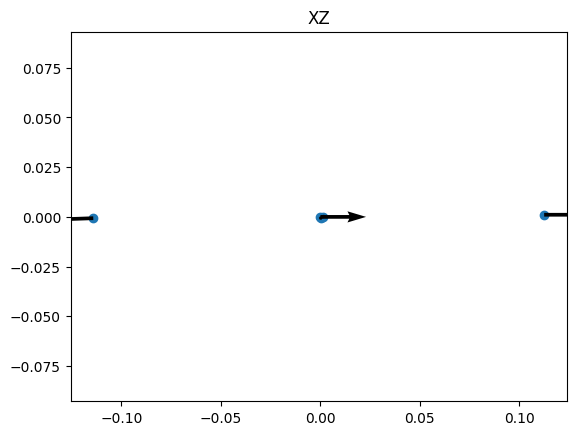

0.0
-90.68349375372739
0.0
-90.16670268718357
178.17493134262554


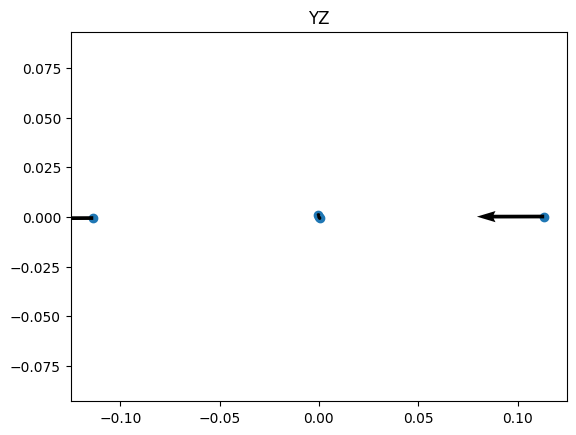

In [7]:
import json
# %matplotlib notebook
panos = []
cam_head_model = ImageNode()

cam_head_model.pos_x = 0
cam_head_model.pos_y = 0
cam_head_model.pos_z = 0
cam_head_model.orientation = (0, 0, 0 ,1)
panos.append(cam_head_model)

cam0_model = ImageNode()

cam0_model.pos_x = 0.0015357506106269264
cam0_model.pos_y = 0.11339708124682546
cam0_model.pos_z = 0.00018176080608079195
cam0_model.orientation = (-0.43566974293767546, -0.42952854099786708, -0.56303167513739893 ,0.55560097223532456)
panos.append(cam0_model)

cam1_model = ImageNode()

cam1_model.pos_x = 0.11250452918585144
cam1_model.pos_y = -0.00021724002701028523
cam1_model.pos_z = 0.0010719139085472
cam1_model.orientation = (0, 0.60876141981435583, 0,0.79335334734631935)
panos.append(cam1_model)

cam2_model = ImageNode()

cam2_model.pos_x = 0.00014796500811924129
cam2_model.pos_y = -0.11356779431087526
cam2_model.pos_z = -0.00059219062508247475
cam2_model.orientation = (0.4318979698852744, 0.43289517297104146, -0.55943593181970508,0.55955102628479647)
panos.append(cam2_model)

cam3_model = ImageNode()

cam3_model.pos_x = -0.11418824480459763
cam3_model.pos_y = 0.00038795309106007118
cam3_model.pos_z = -0.00066148408954553109
cam3_model.orientation = (-0.61137763235629028, -0.0041506355204041128, 0.79132587820439926,0.0018754634707168728)
panos.append(cam3_model)

# with open(path, mode='r') as file:
#     csvfile = csv.reader(file)
#     panos = []
#     count = 0

#     for line in csvfile:
#         line = line[0].split('; ')

#         if not line[0].startswith("#") and count < 2:
#             print(line)
#             panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "pano", line[1])
#             pn = ImageNode(path=panoPath)
#             pn.name = line[1]
#             pn.timestamp = line[2]
#             pn.pos_x = line[3]
#             pn.pos_y = line[4]
#             pn.pos_z = line[5]
#             pn.orientation = (line[7], line[8], line[9],line[6])
#             panos.append(pn)
#             count = count +1


# cams = []        
# for pano in panos:
#     pano_name = pano.name.split("-")[0]
#     pano.linkedNodes = []
#     info_name = pano_name + "-info.json"
#     info_path = panoPath = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "info", info_name)
    
#     if os.path.isfile(info_path):
#         f = open(info_path)
#         data = json.load(f)

#         pn = ImageNode()
#         pn.timestamp = data['timestamp']
#         pn.pos_x = data['cam_head']['position'][0]
#         pn.pos_y = data['cam_head']['position'][1]
#         pn.pos_z = data['cam_head']['position'][2]
#         pn.orientation = (data['cam_head']["quaternion"][3], data['cam_head']["quaternion"][0], data['cam_head']["quaternion"][1],data['cam_head']["quaternion"][2])
#         panos.append(pn)

#         # cam0 = ImageNode()
#         # cam0.name = pano_name + "-cam0.jpg"
#         # cam0.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
#         # cam0.timestamp = data['timestamp']

#         # cam0.pos_x = data['cam0']['position'][0]
#         # cam0.pos_y = data['cam0']['position'][1]
#         # cam0.pos_z = data['cam0']['position'][2]
#         # cam0.orientation = (data['cam0']['quaternion'][0], data['cam0']['quaternion'][1], data['cam0']['quaternion'][2],data['cam0']['quaternion'][3])
#         # cams.append(cam0)
#         # pano.linkedNodes.append(cam0)

#         # cam1 = ImageNode()
#         # cam1.name = pano_name + "-cam1.jpg"
#         # cam1.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
#         # cam1.timestamp = data['timestamp']

#         # cam1.pos_x = data['cam1']['position'][0]
#         # cam1.pos_y = data['cam1']['position'][1]
#         # cam1.pos_z = data['cam1']['position'][2]
#         # cam1.orientation = (data['cam1']['quaternion'][0], data['cam1']['quaternion'][1], data['cam1']['quaternion'][2],data['cam1']['quaternion'][3])
#         # cams.append(cam1)
#         # pano.linkedNodes.append(cam1)

#         # cam2 = ImageNode()
#         # cam2.name = pano_name + "-cam2.jpg"
#         # cam2.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
#         # cam2.timestamp = data['timestamp']

#         # cam2.pos_x = data['cam2']['position'][0]
#         # cam2.pos_y = data['cam2']['position'][1]
#         # cam2.pos_z = data['cam2']['position'][2]
#         # cam2.orientation = (data['cam2']['quaternion'][0], data['cam2']['quaternion'][1], data['cam2']['quaternion'][2],data['cam2']['quaternion'][3])
#         # cams.append(cam2)
#         # pano.linkedNodes.append(cam2)

#         # cam3 = ImageNode()
#         # cam3.name = pano_name + "-cam3.jpg"
#         # cam3.path = os.path.join(data_directory,'datasets_proc',mapping_sessions[0], "cam", cam0.name)
#         # cam3.timestamp = data['timestamp']

#         # cam3.pos_x = data['cam3']['position'][0]
#         # cam3.pos_y = data['cam3']['position'][1]
#         # cam3.pos_z = data['cam3']['position'][2]
#         # cam3.orientation = (data['cam3']['quaternion'][0], data['cam3']['quaternion'][1], data['cam3']['quaternion'][2],data['cam3']['quaternion'][3])
#         # cams.append(cam3)
#         # pano.linkedNodes.append(cam3)
#         # cams.append(pano)

#         f.close()

         
plot_pano_positions(panos, headings=True, z = False)
plot_pano_positions_xz(panos, headings=True)
plot_pano_positions_yz(panos, headings=True)